# Newsgroups Clustering
##### Given a corpus of news articles , grouping them into clusters using algorithms like K-means and Agglomerative Clustering


In [ ]:
import nltk
nltk.download('punkt')    
# if u r facing issues while importing nltk, please uncomment above line and run
import re
import numpy as np
import sklearn
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
%pip install sentence-transformers
from sentence_transformers import SentenceTransformer


## Dataset

The 20 newsgroups dataset comprises around 18000 newsgroups posts on 20 topics split in two subsets: train and test.<br>

A set of basic pre-processing steps are made on the article<br>
Used bert model to obtain the embeddings<br>


In [ ]:
# loading of dataset

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups(subset='train')

print(list(newsgroups_train))
print(type(newsgroups_train))
#['data', 'filenames', 'target_names', 'target', 'DESCR']
# all we require for our task is data and target. 
#target_names describe the different groups present (which are 20) all over the dataset

print(list(newsgroups_train.target_names))

['data', 'filenames', 'target_names', 'target', 'DESCR']
<class 'sklearn.utils.Bunch'>
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [ ]:
ARTICLES_LIST = list(newsgroups_train['data'])
TARGETS_LIST = list(newsgroups_train['target'])
TARGET_NAME_LIST = list(newsgroups_train['target_names'])
TARGET_LABEL_LIST = list(range(len(TARGET_NAME_LIST)))
print(len(ARTICLES_LIST))
print(TARGET_LABEL_LIST)

11314
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
bert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [ ]:
print(newsgroups_train['data'][1])
print(newsgroups_train['target'])

From: guykuo@carson.u.washington.edu (Guy Kuo)
Subject: SI Clock Poll - Final Call
Summary: Final call for SI clock reports
Keywords: SI,acceleration,clock,upgrade
Article-I.D.: shelley.1qvfo9INNc3s
Organization: University of Washington
Lines: 11
NNTP-Posting-Host: carson.u.washington.edu

A fair number of brave souls who upgraded their SI clock oscillator have
shared their experiences for this poll. Please send a brief message detailing
your experiences with the procedure. Top speed attained, CPU rated speed,
add on cards and adapters, heat sinks, hour of usage per day, floppy disk
functionality with 800 and 1.4 m floppies are especially requested.

I will be summarizing in the next two days, so please add to the network
knowledge base if you have done the clock upgrade and haven't answered this
poll. Thanks.

Guy Kuo <guykuo@u.washington.edu>

[7 4 4 ... 3 1 8]


In [ ]:
#preprocessing of sentences and the article

def remove_punct(text):
  text = re.sub('[^a-zA-Z0-9 ]+','', text)
  return text

def remove_urls(text):
  url_pattern = re.compile(r'https?://\S+|www\.\S+')
  return url_pattern.sub(r'', text)

def remove_tag(text):   
  # text=' '.join(text)
  html_pattern = re.compile('<.*?>')
  return html_pattern.sub(r'', text)

def pre_process_sentence(sentence):
  sentence = sentence.lower()
  sentence = remove_tag(sentence)
  sentence = remove_urls(sentence)
  sentence = remove_punct(sentence)
  # sentence = remove_punct(remove_urls(remove_tag(sentence)))
  return sentence

def pre_process_article(article):
  article = str(article).replace("\n", ' ')
  article = sent_tokenize(article)
  sentences = []
  for each in article:
    if len(each.split(":")) > 1:
      continue
    sentences.append(pre_process_sentence(each))
  return sentences



In [ ]:
pre_process_article(newsgroups_train['data'][1])

['please send a brief message detailing your experiences with the procedure',
 'top speed attained cpu rated speed add on cards and adapters heat sinks hour of usage per day floppy disk functionality with 800 and 14 m floppies are especially requested',
 'i will be summarizing in the next two days so please add to the network knowledge base if you have done the clock upgrade and havent answered this poll',
 'thanks',
 'guy kuo ']

In [ ]:

def get_review_embedding(article):
  sentences = pre_process_article(article)

  #here review(input) has to be a list of sentences
  #use suitable embeddings to get an embedding for the whole review
  #usage of sentence embeddings is recommended

  sentence_embeddings = bert_model.encode(sentences)

  # take average of all sentence embeddings to obtain a review embedding 
  review_embedding = np.zeros(768)
  cnt = 0
  for each in sentence_embeddings:
    review_embedding = np.add(np.array(each), review_embedding)
    cnt += 1
  
  if cnt != 0:
    review_embedding /= cnt

  return review_embedding




In [ ]:
get_review_embedding(ARTICLES_LIST[0])

array([ 5.62195892e-02,  4.07897994e-01,  1.07250689e+00,  7.45035168e-02,
        4.25771339e-01,  3.34817767e-02,  2.21827622e-01,  3.08888663e-01,
        2.06333957e-01, -3.32645753e-01,  5.69996610e-03,  9.33280114e-02,
        4.47319931e-01,  3.27933748e-01,  1.47091151e-01,  9.86681852e-02,
       -4.12433911e-01,  1.34284439e-01,  1.42671919e-01, -2.46188520e-01,
       -3.79259695e-01,  3.75766947e-02, -2.44057406e-01, -3.01892889e-01,
       -1.04653689e-01,  1.02148165e-01,  3.59541456e-01, -6.79430052e-01,
       -6.99132549e-01,  4.80901109e-02, -1.89545754e-01,  3.80229937e-01,
        1.96678696e-01, -2.16041209e-01,  5.60460420e-01,  1.75521307e-01,
       -3.93044839e-01, -1.54202035e-01, -2.03344545e-03,  3.78718195e-02,
        6.12607498e-01, -1.87497064e-01,  5.94660410e-01,  1.34420550e-01,
       -7.00732449e-01, -3.90465134e-01,  2.80054586e-01,  5.73700411e-01,
       -2.96017709e-02, -7.96218495e-01,  1.06471669e-01, -3.18668431e-01,
        4.26258141e-01,  

In [ ]:
from tqdm import tqdm
X = []
for i in tqdm(range(len(ARTICLES_LIST))):
  X.append(get_review_embedding(ARTICLES_LIST[i]))

print(len(X) , X[0].shape)

y = []
y[:] = TARGETS_LIST
print(len(y))

100%|██████████| 11314/11314 [15:19<00:00, 12.30it/s]

11314 (768,)
11314


In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(np.array(X))
X_scaled

array([[ 0.02490765,  0.49699285,  0.14614698, ..., -0.06476412,
        -0.39474187, -1.20798083],
       [ 0.15748035, -0.56029027,  0.95706876, ...,  1.08732645,
         0.37819124, -0.16383826],
       [ 0.41560609, -0.75756912, -0.5245345 , ...,  0.21125766,
         0.06327762, -1.36225551],
       ...,
       [ 1.44128958, -0.51679668, -0.53205587, ..., -0.90197855,
        -1.13253687, -0.41354073],
       [-0.72391384,  0.01802589,  0.73581602, ..., -0.69975457,
        -0.12539635,  1.43971907],
       [ 1.14591129,  0.30756731,  0.22655544, ..., -1.25990859,
        -0.04247492, -1.78115362]])

In [ ]:
# data visualization 


import sklearn
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca_2d =  PCA(n_components=2)

X_2d = pca_2d.fit_transform(X_scaled)


In [ ]:
X_2d

array([[ 6.77176249, -4.40118081],
       [ 7.87736026, -9.40972625],
       [-7.90954861, -4.51257924],
       ...,
       [-7.99930745,  0.61226786],
       [ 4.31523399,  2.82816248],
       [ 3.73340401, -0.57376751]])

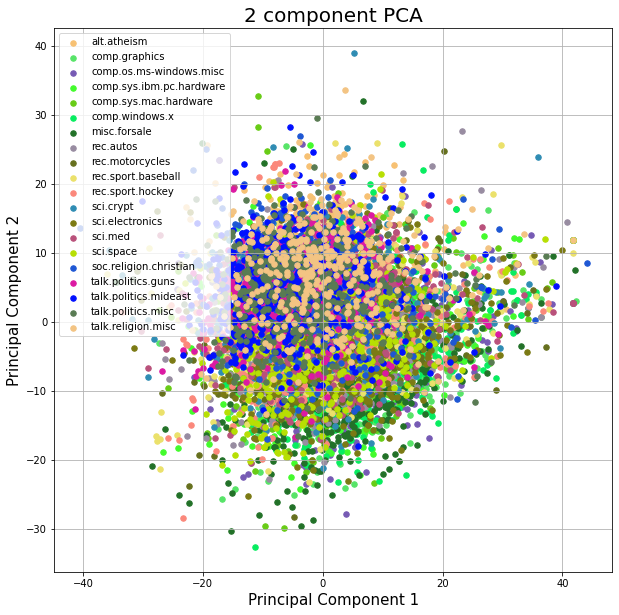

In [ ]:
import random
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
target_names = TARGET_NAME_LIST
targets = TARGET_LABEL_LIST
colors = [(random.random(),random.random(),random.random()) for ele in TARGET_NAME_LIST]
for target, color in zip(targets,colors):
    indicesToKeep = (np.array(y) == target)
    ax.scatter(X_2d[indicesToKeep , 0]
               , X_2d[indicesToKeep , 1]
               , color = color
               , s = 30)
ax.legend(target_names)
ax.grid()


# K_Means Algorithm


In [ ]:

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=len(TARGET_LABEL_LIST), random_state=4).fit(X_scaled)

In [ ]:
print(kmeans.labels_)
print(list(np.unique(kmeans.labels_)))


[ 2 15  0 ... 11 13  2]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


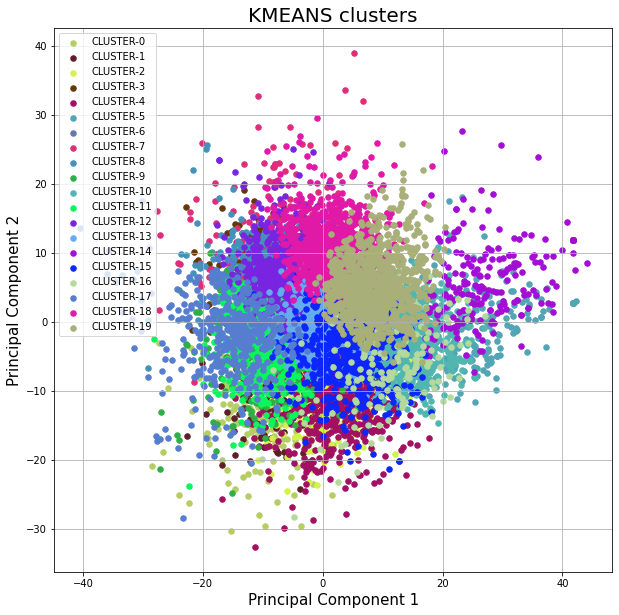

In [ ]:
#code for visualisation of clusters
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('KMEANS clusters', fontsize = 20)
targets = list(np.unique(kmeans.labels_))
target_names = ["CLUSTER-" + str(ele) for ele in targets]
colors = [(random.random(),random.random(),random.random()) for ele in TARGET_NAME_LIST]
for target, color in zip(targets,colors):
    indicesToKeep = (kmeans.labels_ == target)
    ax.scatter(X_2d[indicesToKeep , 0]
               , X_2d[indicesToKeep , 1]
               , color = color
               , s = 30)
ax.legend(target_names)
ax.grid()



# Elbow method

* Elbow method to find the optimal number of clusters, 







100%|██████████| 20/20 [04:56<00:00, 14.81s/it]


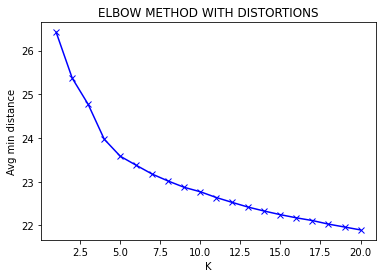

In [ ]:
from scipy.spatial.distance import cdist
def elbow_method(method='distortions'):
  avg_distances = []
  inertias = []
  ks = []
  for k in tqdm(range(1,21)):
    # print(k)
    ks.append(k)
    kmeans_model = KMeans(n_clusters=k, random_state=4).fit(X_scaled)
    dist = sum(np.min(cdist(X_scaled , kmeans_model.cluster_centers_ , 'euclidean') , axis=1)) / X_scaled.shape[0]
    avg_distances.append(dist)
    inertias.append(kmeans_model.inertia_)
  
  if method == 'distortions':
    plt.plot(ks , avg_distances , 'bx-')
    plt.xlabel('K')
    plt.ylabel('Avg min distance')
    plt.title('ELBOW METHOD WITH DISTORTIONS')
    plt.show()
  else:
    plt.plot(ks , inertias , 'bx-')
    plt.xlabel('K')
    plt.ylabel('Inertia')
    plt.title('ELBOW METHOD WITH INERTIA')
    plt.show()




elbow_method('distortions')


100%|██████████| 20/20 [04:46<00:00, 14.32s/it]


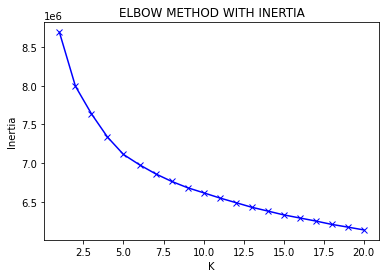

In [ ]:
elbow_method('inertia')

### According to elbow method, the \"elbow\" appears at k=5 , therefore 5 clusters is optimal

# Silhouette Method


*   Compute silhouette score varying the K number of clusters

*   Plot the graph between silhoutte score and number of clusters 

*   Find the optimal number of clusters using silhouette method




> Report the optimal number of clusters you obtained from above two methods (elbow and silhouette)




100%|██████████| 19/19 [06:10<00:00, 19.52s/it]


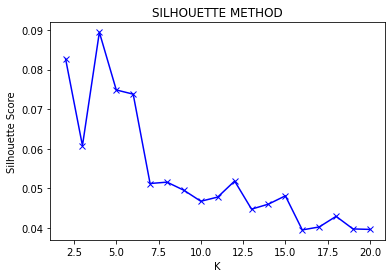

In [ ]:
from sklearn.metrics import silhouette_score as SIL_SCORE
def silhouette_score():
  sil_scores = []
  ks = []
  for k in tqdm(range(2,21)):
    # print(k)
    ks.append(k)
    kmeans_model = KMeans(n_clusters=k, random_state=4).fit(X_scaled)
    score = SIL_SCORE(X_scaled , kmeans_model.labels_)
    sil_scores.append(score)
    # print(sil_scores)
  
  plt.plot(ks , sil_scores , 'bx-')
  plt.xlabel('K')
  plt.ylabel('Silhouette Score')
  plt.title('SILHOUETTE METHOD')
  plt.show()

  
silhouette_score()


##### Optimal k according to silhouette method is **4** (highest avg score)

# Agglomerative clustering

In [ ]:


from sklearn.cluster import AgglomerativeClustering as AggClust

def AgglomerativeClustering(n_clusters):
  clustering = AggClust(n_clusters=n_clusters , compute_distances=True).fit(X_scaled)
  return  clustering , clustering.labels_

agglo_cluster_model,agglo_cluster_labels = AgglomerativeClustering(len(TARGET_NAME_LIST))




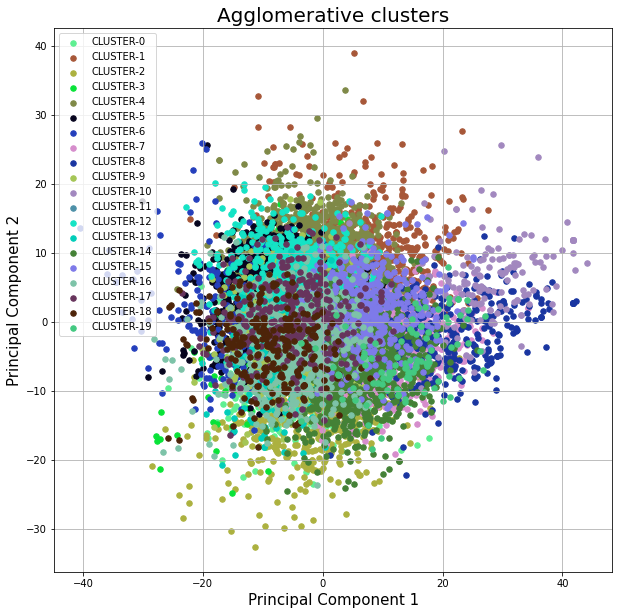

In [ ]:
#code for visualisation of clusters
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('Agglomerative clusters', fontsize = 20)
targets = list(np.unique(agglo_cluster_model.labels_))
target_names = ["CLUSTER-" + str(ele) for ele in targets]
colors = [(random.random(),random.random(),random.random()) for ele in TARGET_NAME_LIST]
for target, color in zip(targets,colors):
    indicesToKeep = (agglo_cluster_model.labels_ == target)
    ax.scatter(X_2d[indicesToKeep , 0]
               , X_2d[indicesToKeep , 1]
               , color = color
               , s = 30)
ax.legend(target_names)
ax.grid()



# Dendogram




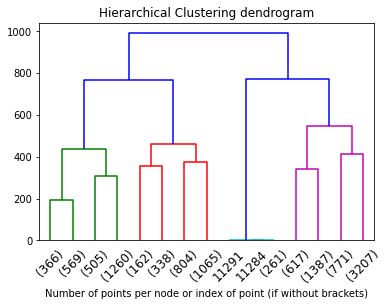

In [ ]:
# code to write dendogram
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(agglo_cluster_model , truncate_mode='level' , p=3)
plt.xlabel("Number of points per node or index of point (if without brackets)")
plt.title("Hierarchical Clustering dendrogram")
plt.xticks(rotation=45)
plt.show()




## Difference between agglomerative and divisive<br>
In Agglomerative hierarchical method, each object creates its own clusters. The single Clusters are merged to make larger clusters and the process of merging continues until all the singular clusters are merged into one big cluster that consists of all the objects.<br>

Divisive Hierarchical clustering method works on the top-down approach. In this method all the objects are arranged within a big singular cluster and the large cluster is continuously divided into smaller clusters until each cluster has a single object.<br>


